In [1]:
project_path = "genbank"

In [2]:
import glob
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# From Kate's genbank.py script
big_df = pd.read_csv(project_path+"/"+"genbank_normal.txt", delimiter="\t", header=0)

for file in glob.glob(f"{project_path}genbank_T*.txt"):
    df = pd.read_csv(file, delimiter="\t", header=0)
    big_df = pd.merge(big_df, df, on='Genome', how='outer')

big_df

,Genome,Normal,"TAG,TGA,TAA","TAG,TGA","TAG,TAA","TGA,TAA",TAG,TGA,TAA
0,Bc01.fasta,0.963437,0.895257,0.973547,0.898114,0.969072,0.972348,0.981819,0.965146
1,Bc02.fasta,0.951122,0.882262,0.966218,0.893017,0.897580,0.962811,0.979385,0.892132
2,Bc03.fasta,0.952583,0.883714,0.965646,0.894466,0.898867,0.963415,0.978839,0.893421
3,Bc04.fasta,0.963428,0.895248,0.974087,0.897985,0.969062,0.972938,0.982029,0.964626
4,Bc05.fasta,0.953710,0.888019,0.974246,0.890459,0.964943,0.970264,0.974205,0.963463
5,Bc06.fasta,0.953487,0.887720,0.972683,0.898203,0.898593,0.967591,0.979554,0.892401
6,Bc07.fasta,0.953623,0.887979,0.968633,0.890082,0.965192,0.972043,0.971390,0.960689
7,Bc08.fasta,0.950971,0.885168,0.973944,0.888803,0.962203,0.968676,0.971810,0.963193
8,Bc09.fasta,0.952069,0.884127,0.972587,0.915929,0.962323,0.967470,0.970979,0.966519
9,Bc10.fasta,0.951549,0.884904,0.975149,0.959333,0.905010,0.973392,0.976700,0.967965


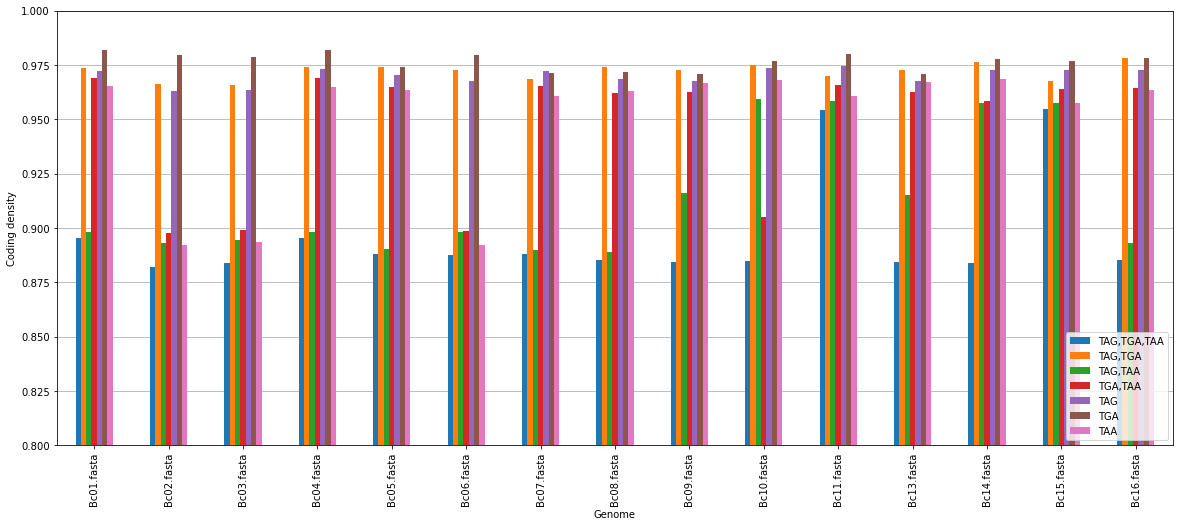

In [4]:
ax = big_df.plot(x="Genome", y=big_df.columns[2:], kind="bar", figsize=(20, 8))
ax.set(xlabel = 'Genome', ylabel='Coding density')
ax.legend(loc="lower right")
ax.yaxis.grid()
ax.set_axisbelow(True)
plt.ylim(0.8, 1)
plt.savefig(project_path+"Bc_coding_density.pdf", dpi=300, bbox_inches='tight', format='pdf') 

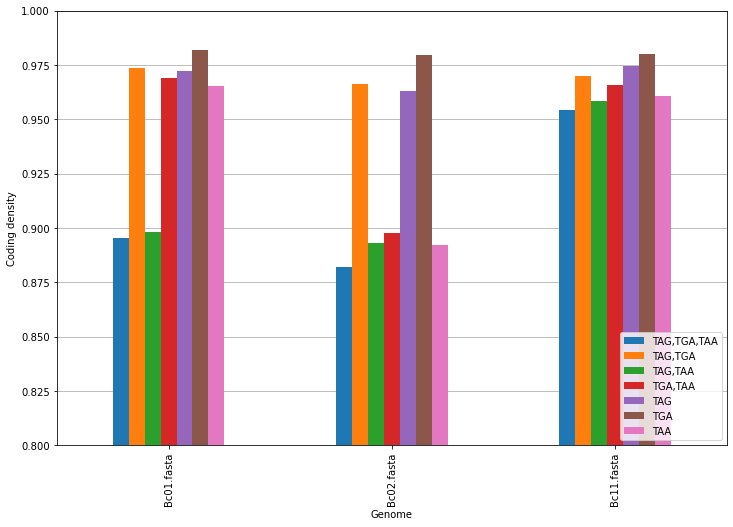

In [5]:
new_big_df = big_df["Genome"].isin(["Bc01.fasta", "Bc02.fasta", "Bc11.fasta"])
big_df = big_df[new_big_df]
ax = big_df.plot(x="Genome", y=big_df.columns[2:], kind="bar", figsize=(12, 8))
ax.set(xlabel = 'Genome', ylabel='Coding density')
ax.legend(loc="lower right")
ax.yaxis.grid()
ax.set_axisbelow(True)
plt.ylim(0.8, 1)
plt.savefig(project_path+"Bc_coding_density_filtered.pdf", dpi=300, bbox_inches='tight', format='pdf') 